In [1]:
#Importing libraries
import pandas as pd
import numpy as np

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Linear model
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
#Splitting the data
from sklearn.model_selection import train_test_split

#Linear  rainbow test
from statsmodels.stats.diagnostic import linear_rainbow

import scipy.stats as stats

#Model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error

#Cross validation
from sklearn.model_selection import KFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
df=pd.read_csv('NY-House-Dataset.csv')

In [3]:
#First five observations
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,Not Specified,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
#Last 5 observations
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1,Not Specified,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1,Not Specified,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1,Not Specified,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1,655,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1,750,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [5]:
df.shape

(4801, 17)

In [6]:
#Checking the data types
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                            object
PROPERTYSQFT                    object
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

* Observation :
    * Two columns that are numeric have been classified as object('BATH','PROPERTYSQFT').
    * This due to the string ' Not Specified' in certain columns.
    * Number of rows with such strings are provided in the next cell.
    

In [7]:
print(df[df['BATH']=='Not Specified'].shape[0])
print(df[df['PROPERTYSQFT']=='Not Specified'].shape[0])

302
1637


In [8]:
#Checking for null values.
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [9]:
#Finding out where the BATH is labelled 0.
df[df['BATH']=='0']

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2699,Brokered by COMPASS,Pending,675000,3,0,2780,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
2704,Brokered by COMPASS,Pending,675000,3,0,2780,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
3379,Brokered by Brown Harris Stevens,Townhouse for sale,14995000,3,0,Not Specified,50 W 86th St Unit Townhouse,"Manhattan, NY 10024","50 W 86th St Unit TownhouseManhattan, NY 10024",United States,New York,New York County,New York,West 86th Street,"50 W 86th St, New York, NY 10024, USA",40.786046,-73.971834


* Observations:
    * Index numbers 2699,2704,3379 have BATH value 0.
    * We need these indexes because we will be imputting 'Not specified' with 0.
    

In [10]:
#Replacing the values labelled 'Not Specified' as 0
df['BATH']=df['BATH'].replace('Not Specified',0)

In [11]:
#Changing the data type
df['BATH']=df['BATH'].astype(int)

In [12]:
#Finding out where the BATH is labelled 0.
df[df['PROPERTYSQFT']=='0']

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [13]:
#Replacing the values labelled 'Not Specified' as 0
df['PROPERTYSQFT']=df['PROPERTYSQFT'].replace('Not Specified',0)

In [14]:
#Changing the data type
df['PROPERTYSQFT']=df['PROPERTYSQFT'].astype(int)

In [15]:
#Rechecking the data types
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                             int32
PROPERTYSQFT                     int32
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

### Treatment of values imputted with 0 in BATH.

In [16]:
df.groupby('BEDS')['BATH'].describe()

,count,mean,std,min,25%,50%,75%,max
BEDS,,,,,,,,
1,820.0,1.079268,0.300280,0.0,1.0,1.0,1.0,2.0
2,995.0,1.591960,0.540452,0.0,1.0,2.0,2.0,4.0
3,1456.0,1.861951,1.411113,0.0,1.0,2.0,2.0,32.0
4,570.0,2.719298,1.193927,0.0,2.0,2.0,4.0,6.0
5,360.0,3.069444,1.603673,0.0,2.0,3.0,4.0,7.0
6,271.0,3.601476,1.991611,0.0,3.0,4.0,5.0,17.0
7,105.0,4.133333,2.312452,0.0,3.0,4.0,6.0,10.0
8,84.0,4.583333,2.720774,0.0,3.0,4.0,6.0,16.0
9,39.0,4.641026,2.288267,0.0,3.0,5.0,6.0,11.0


In [17]:
#Replacing the values imputted 0 with the respective mean values groupwise.
df['BATH']=df.groupby('BEDS')['BATH'].apply(lambda x: x.replace(0,np.round(x.mean())))

In [18]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,4,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [19]:
# Sanitary check to check wether the code worked
df[df['BATH']==0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [20]:
#Imputting the 0 where the values were previously labelled 0
df.loc[[2699,2704,3379],'BATH']=0

### Treatment of values imputted with 0 in 	PROPERTYSQFT .

In [21]:
df.groupby('BEDS')['PROPERTYSQFT'].describe()

,count,mean,std,min,25%,50%,75%,max
BEDS,,,,,,,,
1,820.0,463.008537,484.938609,0.0,0.0,614.0,780.00,5400.0
2,995.0,770.047236,648.133009,0.0,0.0,900.0,1149.00,5834.0
3,1456.0,1306.889423,3256.709938,0.0,0.0,1149.0,1710.25,65535.0
4,570.0,1828.221053,1643.749017,0.0,0.0,1820.5,2659.25,13000.0
5,360.0,2214.913889,2082.678140,0.0,0.0,2080.0,3431.00,17860.0
6,271.0,2471.383764,2901.610684,0.0,0.0,2310.0,3490.50,32000.0
7,105.0,3794.352381,3923.424559,0.0,1040.0,2800.0,4950.00,20000.0
8,84.0,3783.702381,4540.705947,0.0,0.0,3167.5,5176.00,33000.0
9,39.0,3233.717949,2599.006561,0.0,0.0,3318.0,4489.50,10500.0


In [22]:
#Replacing the values imputted 0 with the respective mean values groupwise.
df['PROPERTYSQFT']=df.groupby('BEDS')['PROPERTYSQFT'].apply(lambda x: x.replace(0,np.round(x.mean())))

In [23]:
#Sanitary Check
df[df['PROPERTYSQFT']==0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


* This step completes the process of dealing with the null values.

In [24]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,4,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1,463,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1,463,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1,463,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1,655,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


## Univariate Analysis

In [25]:
df_num_cols=df.select_dtypes(include=np.number)

In [26]:
df_num_cols.drop(['LATITUDE','LONGITUDE'],axis=1,inplace=True)

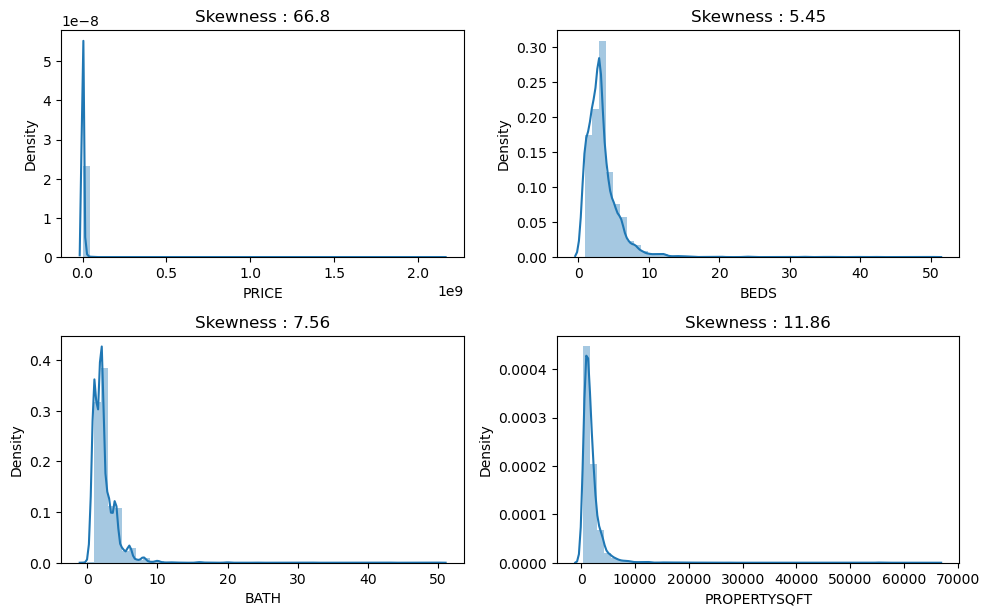

In [27]:

t=1
plt.figure(figsize=(10,15))
for i in df_num_cols:
    plt.subplot(5,2,t)
    sns.distplot(df_num_cols[i])
    plt.title(f'Skewness : {np.round(df_num_cols[i].skew(),2)}')
    plt.tight_layout()
    t+=1
plt.show()
    

* Observations:
    * For all the numeric columns the data is concentrated.
    * The data has some extreme outliers which is natural for big houses.
    * The data also shows highly skewed data.
    

In [28]:
df_cat_cols=df.select_dtypes(include='object')

In [29]:
df_cat_cols.drop(['ADDRESS','MAIN_ADDRESS','LONG_NAME','FORMATTED_ADDRESS'],axis=1,inplace=True)

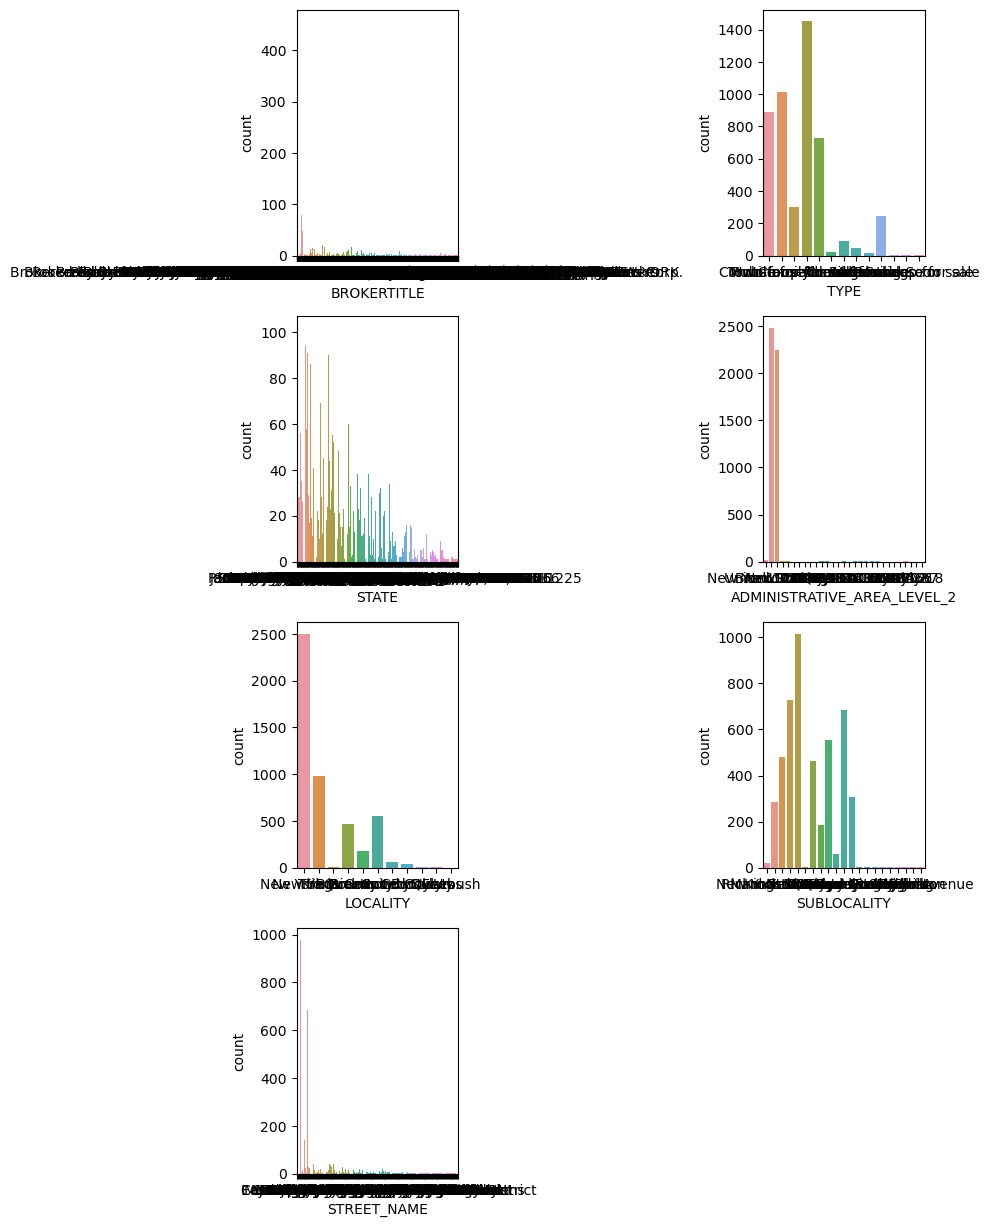

In [30]:

t=1
plt.figure(figsize=(10,15))
for i in df_cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(x=df_cat_cols[i])
    plt.tight_layout()
    t+=1
plt.show()
    

* Observations:
    * The countplots do not provide a clear picture due the wide no of categories.
    * This will be dealt later using feature engineering.

## Bivariate Analysis

<Axes: >

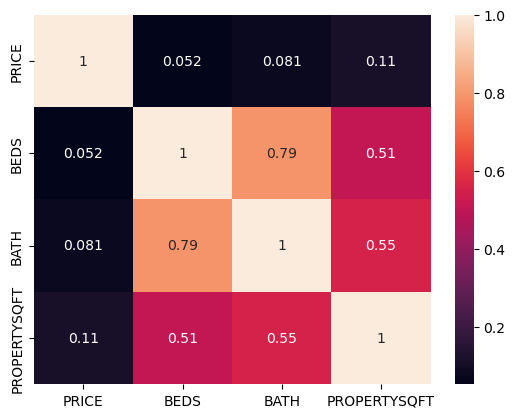

In [31]:
#Heatmap
sns.heatmap(df_num_cols.corr(),annot=True)

* Observations: 
    * Features BEDS, BATH have high correlation with PROPERTYSQFT
    * PRICE is most correlated with PROPERTYSQFT

In [32]:
#Scatterplots of PRICE with other Numeric Variables.

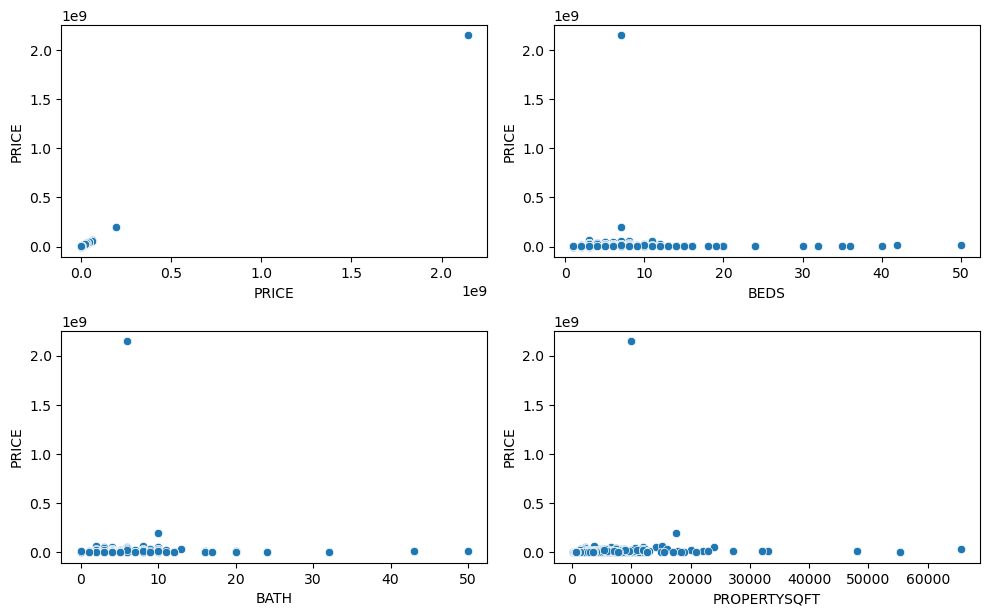

In [33]:

t=1
plt.figure(figsize=(10,15))
for i in df_num_cols:
    plt.subplot(5,2,t)
    sns.scatterplot(y=df_num_cols['PRICE'],x=df_num_cols[i])
    plt.tight_layout()
    t+=1
plt.show()
    

* Observation:
    * Price has a positive relationship with all the numeric features.

## Feature Engineering

In [34]:
#Broker titles
df['BROKERTITLE_N']=df['BROKERTITLE'].str[12:]

In [35]:
#TYPE of property
l=[]
for i in range(4801):
    l.append(df['TYPE'].str.split()[i][0])





In [36]:
df['TYPE_N']=l

In [37]:
df['TYPE_N']=df['TYPE_N'].replace('For','Sale')

## Feature Extraction

In [38]:
#Extracting pincodes 
pincode=[]
for i in range(4801):
    pincode.append(df['STATE'].str.split()[i][-1])

In [39]:
df['PINCODE']=pincode

In [40]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKERTITLE_N,TYPE_N,PINCODE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,Douglas Elliman -111 Fifth Ave,Condo,10022
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,Serhant,Condo,10019
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Sowae Corp,House,10312
3,Brokered by COMPASS,Condo for sale,69000,3,1,445,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,COMPASS,Condo,10022
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,4,14175,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,Sotheby's International Realty - East Side Man...,Townhouse,10065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1,463,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,COMPASS,Co-op,10075
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1,463,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,Mjr Real Estate Llc,Co-op,11374
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1,463,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,Douglas Elliman - 575 Madison Ave,Co-op,10011
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1,655,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,E Realty International Corp,Condo,11373


In [41]:
#Dropping unnecassary columns with similar information
df.drop(['BROKERTITLE','TYPE','ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS','LATITUDE','LONGITUDE'],axis=1,inplace=True)

### Data after feature engineering and extraction

In [42]:
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,BROKERTITLE_N,TYPE_N,PINCODE
0,315000,2,2,1400,Manhattan,Douglas Elliman -111 Fifth Ave,Condo,10022
1,195000000,7,10,17545,New York County,Serhant,Condo,10019
2,260000,4,2,2015,Richmond County,Sowae Corp,House,10312
3,69000,3,1,445,New York County,COMPASS,Condo,10022
4,55000000,7,4,14175,New York County,Sotheby's International Realty - East Side Man...,Townhouse,10065


## Encoding the categorical variables

In [43]:
sub=df['SUBLOCALITY'].value_counts(normalize=True)

In [44]:
df['SUBLOCALITY']=df['SUBLOCALITY'].map(sub)

In [45]:
nroker=df['BROKERTITLE_N'].value_counts(normalize=True)

In [46]:
df['BROKERTITLE_N']=df['BROKERTITLE_N'].map(nroker)

In [47]:
typen=df['TYPE_N'].value_counts(normalize=True)

In [48]:
df['TYPE_N']=df['TYPE_N'].map(typen)

In [49]:
pnc=df['PINCODE'].value_counts(normalize=True)

In [50]:
df['PINCODE']=df['PINCODE'].map(pnc)

### Data after Exploratory Data Analysis and Preprocessing

In [51]:
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,BROKERTITLE_N,TYPE_N,PINCODE
0,315000,2,2,1400,0.004374,0.008332,0.185586,0.015830
1,195000000,7,10,17545,0.059571,0.011248,0.185586,0.013539
2,260000,4,2,2015,0.099979,0.008332,0.210789,0.015205
3,69000,3,1,445,0.059571,0.094980,0.185586,0.015830
4,55000000,7,4,14175,0.059571,0.012914,0.062279,0.013747


In [52]:
X=df.drop('PRICE',axis=1)
y=df['PRICE']

## Model Building

### Checking for assumptions of Linear Regression.

#### Before model making.

* Assumption 1 : Target variable has to be numeric

In [53]:
df['PRICE'].dtypes

dtype('int64')

* Assumption 2 : Absence of multicolllinearity.

In [54]:
vif=[]
for i in range(7):
    vif.append(variance_inflation_factor(X.values,i))

In [55]:
vif

[7.022936150159504,
 7.300508565406738,
 2.3537156157229466,
 5.376014684601679,
 1.3081448224652088,
 5.0961057062237805,
 3.576517138734758]

In [56]:
pd.DataFrame(vif,X.columns)

,0
BEDS,7.022936
BATH,7.300509
PROPERTYSQFT,2.353716
SUBLOCALITY,5.376015
BROKERTITLE_N,1.308145
TYPE_N,5.096106
PINCODE,3.576517


* Observations :
    * Since all the values are less than 10, we can infer there is no multicollinearity in the data.

#### After making the model.

In [57]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=10)

In [58]:
#Sanitary check
print(f'No of rows and columns in x_train : {x_train.shape}')
print(f'No of rows and columns in x_test : {x_test.shape}')
print(f'No of rows and columns in y_train : {y_train.shape}')
print(f'No of rows and columns in y_test : {y_test.shape}')


No of rows and columns in x_train : (3840, 7)
No of rows and columns in x_test : (961, 7)
No of rows and columns in y_train : (3840,)
No of rows and columns in y_test : (961,)


In [59]:
#Fitting the model

base_model=sma.OLS(y_train,x_train).fit()

In [60]:
#Summary o fthe base model
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              353.6
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:13:51   Log-Likelihood:                         -63239.
No. Observations:                3840   AIC:                                  1.265e+05
Df Residuals:                    3833   BIC:                                  1.265e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BEDS          -3.463e+05   3.36e+04    -10.307      0.000   -4.12e+05    -2.8e+05
BATH           7.654e+05   4.88e+04     15.678      0.000     6.7e+05    8.61e+05
PROPERTYSQFT    541.9797     26.232     20.661      0.000     490.549     593.410
SUBLOCALITY   -2.299e+05   9.14e+05     -0.252      0.801   -2.02e+06    1.56e+06
BROKERTITLE_N  1.396e+07   2.13e+06      6.566      0.000    9.79e+06    1.81e+07
TYPE_N        -2.287e+06   5.76e+05     -3.973      0.000   -3.42e+06   -1.16e+06
PINCODE        5.098e+07   9.57e+06      5.330      0.000    3.22e+07    6.97e+07
==============================================================================
Omnibus:                     4639.372   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           893216.972
Skew:                           6.257   Prob(JB):                         0.00
Kurtosis:                      76.661   Cond. No.                     5.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Assumption 3 : There must be a linear relationship between the independent and the dependent variables.

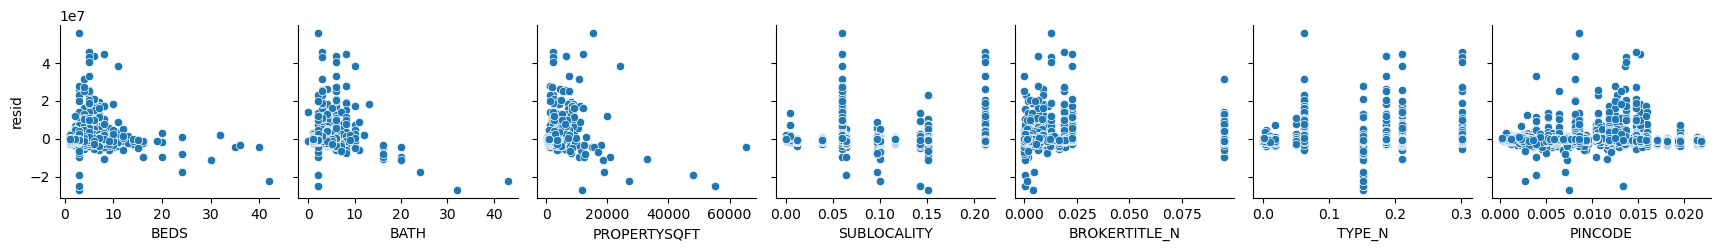

In [61]:
#Pairplot to check the linear relationship
X['resid']=base_model.resid
sns.pairplot(x_vars=['BEDS','BATH','PROPERTYSQFT','SUBLOCALITY','BROKERTITLE_N','TYPE_N','PINCODE'],y_vars='resid',data=X)
plt.show()


In [62]:
#Statistical test
p_value=linear_rainbow(base_model)[1]

In [63]:
if p_value > 0.05:
    print('Accept the Null Hypothesis.')
    print('Variables are linear.')
else:
    print('Do not accept the Null Hypothesis.')
    print('Variables are non-linear.')
    

Accept the Null Hypothesis.
Variables are linear.


* Assumption 4 : Absence of autocorrelation

In [64]:
#Statistical test


* The value of Durbin-Watson test is 2.018 highlighting lack of autocorrelation.

* Assumption 4 : Homoscedasticity

<Axes: >

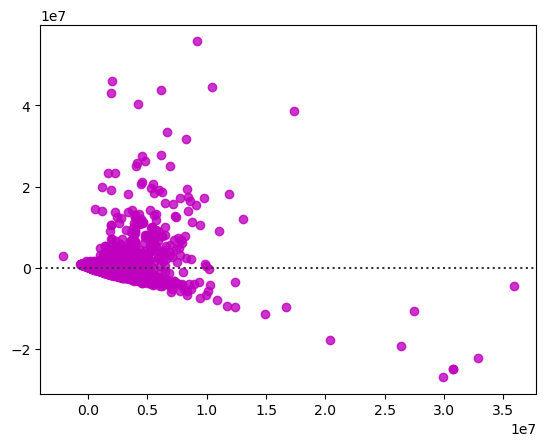

In [65]:
#Resid plot
sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='m')

* The data shows Heteroscedasticity: non-constant variance of residuals.
* This is due to  outliers in the data.

* Assumption 5 : Errors must be normally distributed.
    

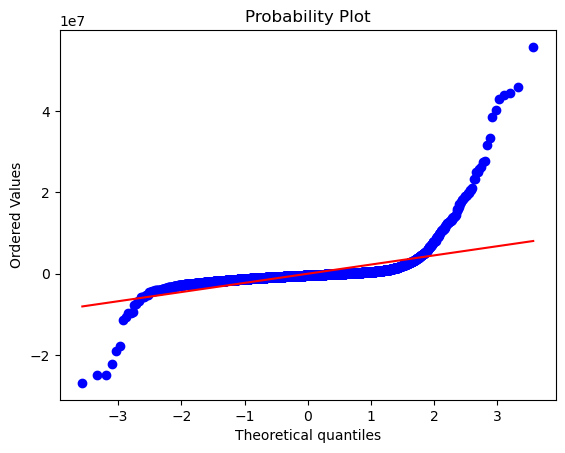

In [66]:
stats.probplot(base_model.resid,plot=plt)
plt.show()

* Errors are not normally distributed.

### Model Improvement

In [67]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              353.6
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:13:53   Log-Likelihood:                         -63239.
No. Observations:                3840   AIC:                                  1.265e+05
Df Residuals:                    3833   BIC:                                  1.265e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BEDS          -3.463e+05   3.36e+04    -10.307      0.000   -4.12e+05    -2.8e+05
BATH           7.654e+05   4.88e+04     15.678      0.000     6.7e+05    8.61e+05
PROPERTYSQFT    541.9797     26.232     20.661      0.000     490.549     593.410
SUBLOCALITY   -2.299e+05   9.14e+05     -0.252      0.801   -2.02e+06    1.56e+06
BROKERTITLE_N  1.396e+07   2.13e+06      6.566      0.000    9.79e+06    1.81e+07
TYPE_N        -2.287e+06   5.76e+05     -3.973      0.000   -3.42e+06   -1.16e+06
PINCODE        5.098e+07   9.57e+06      5.330      0.000    3.22e+07    6.97e+07
==============================================================================
Omnibus:                     4639.372   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           893216.972
Skew:                           6.257   Prob(JB):                         0.00
Kurtosis:                      76.661   Cond. No.                     5.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#Model Evaluation metric
def validation(test,pred,model):
    print(f'R2 : {model.rsquared}')
    print(f'Mean Sqaured Error : {mean_squared_error(test,pred)}')
    print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(test,pred))}')
    print(f'Mean absolute Error : {mean_absolute_error(test,pred)}')

In [69]:
#Performance on the train dataset
validation(y_train,base_model.predict(x_train),base_model)

R2 : 0.3923812052555261
Mean Sqaured Error : 11800526496570.785
Root Mean Squared Error : 3435189.441147429
Mean absolute Error : 1354736.8086197951


* Observation :
    * R2 score is low.
    * All the error terms are high.
    * The model needs improvement.

In [70]:
# Building a model with significant columns.
X=X.drop(['SUBLOCALITY','resid'],axis=1)
y=df['PRICE']
        
    

In [71]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=10)

In [72]:
#Sanitary check
print(f'No of rows and columns in x_train : {x_train.shape}')
print(f'No of rows and columns in x_test : {x_test.shape}')
print(f'No of rows and columns in y_train : {y_train.shape}')
print(f'No of rows and columns in y_test : {y_test.shape}')


No of rows and columns in x_train : (3840, 6)
No of rows and columns in x_test : (961, 6)
No of rows and columns in y_train : (3840,)
No of rows and columns in y_test : (961,)


In [73]:
#Fitting the model

base_model_s=sma.OLS(y_train,x_train).fit()

In [74]:
base_model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              412.6
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:13:53   Log-Likelihood:                         -63239.
No. Observations:                3840   AIC:                                  1.265e+05
Df Residuals:                    3834   BIC:                                  1.265e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BEDS          -3.474e+05   3.33e+04    -10.434      0.000   -4.13e+05   -2.82e+05
BATH           7.645e+05   4.87e+04     15.704      0.000    6.69e+05     8.6e+05
PROPERTYSQFT    542.1257     26.223     20.674      0.000     490.714     593.538
BROKERTITLE_N  1.384e+07   2.07e+06      6.685      0.000    9.78e+06    1.79e+07
TYPE_N        -2.368e+06   4.76e+05     -4.971      0.000    -3.3e+06   -1.43e+06
PINCODE        5.051e+07   9.38e+06      5.384      0.000    3.21e+07    6.89e+07
==============================================================================
Omnibus:                     4641.478   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           893939.592
Skew:                           6.262   Prob(JB):                         0.00
Kurtosis:                      76.690   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
validation(y_train,base_model_s.predict(x_train),base_model_s)

R2 : 0.3923711633823572
Mean Sqaured Error : 11800721519159.666
Root Mean Squared Error : 3435217.8270321763
Mean absolute Error : 1354031.6340674183


* Observations :
    * No significant improvement in the model.
    * We will have to make some changes at the pre-processing stage.

In [76]:
#Combining BEDS and BATHS to bring down multicollinearity.
df['B+B']=df['BATH']/df['BEDS']

In [77]:
viff=[]
for i in range(6):
    viff.append(variance_inflation_factor(X.values,i))

In [78]:
viff

[6.880657525410033,
 7.269533742372782,
 2.351567526150041,
 1.238699972679691,
 3.485852429983448,
 3.4433055452087324]

In [79]:
X=df.drop(['PRICE','BEDS','BATH','SUBLOCALITY'],axis=1)

In [80]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=10)

In [81]:
base_model_v=sma.OLS(y_train,x_train).fit()

In [82]:
base_model_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.363
Method:                 Least Squares   F-statistic:                              438.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:13:53   Log-Likelihood:                         -63328.
No. Observations:                3840   AIC:                                  1.267e+05
Df Residuals:                    3835   BIC:                                  1.267e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PROPERTYSQFT    645.7882     21.708     29.749      0.000     603.228     688.348
BROKERTITLE_N  1.388e+07   2.13e+06      6.520      0.000    9.71e+06    1.81e+07
TYPE_N        -4.254e+06   5.48e+05     -7.766      0.000   -5.33e+06   -3.18e+06
PINCODE        4.662e+07    9.9e+06      4.708      0.000    2.72e+07     6.6e+07
B+B            1.138e+06   1.38e+05      8.238      0.000    8.67e+05    1.41e+06
==============================================================================
Omnibus:                     4639.985   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           840513.639
Skew:                           6.287   Prob(JB):                         0.00
Kurtosis:                      74.380   Cond. No.                     5.53e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
validation(y_train,base_model_v.predict(x_train),base_model_v)

R2 : 0.36374379464109086
Mean Sqaured Error : 12356691851677.9
Root Mean Squared Error : 3515208.6498069926
Mean absolute Error : 1407320.6408691623


* Observations :
    * The changes did not have much affect on the model performance.


## Final Model

In [84]:
#We will now transform the transform the target variable
y=np.log(df['PRICE'])

In [85]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=10)

In [86]:
final_model=sma.OLS(y_train,x_train).fit()

In [87]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          1.012e+04
Date:                Sun, 14 Jan 2024   Prob (F-statistic):                        0.00
Time:                        19:13:53   Log-Likelihood:                         -10427.
No. Observations:                3840   AIC:                                  2.086e+04
Df Residuals:                    3835   BIC:                                  2.090e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PROPERTYSQFT      0.0007   2.26e-05     29.276      0.000       0.001       0.001
BROKERTITLE_N    15.8255      2.215      7.146      0.000      11.483      20.168
TYPE_N           24.0039      0.570     42.133      0.000      22.887      25.121
PINCODE         232.7974     10.297     22.607      0.000     212.609     252.986
B+B               5.5994      0.144     38.973      0.000       5.318       5.881
==============================================================================
Omnibus:                     2343.683   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118800.057
Skew:                          -2.221   Prob(JB):                         0.00
Kurtosis:                      29.884   Cond. No.                     5.53e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
validation(y_train,final_model.predict(x_train),final_model)

R2 : 0.9295585948970306
Mean Sqaured Error : 13.367271802691446
Root Mean Squared Error : 3.65612797952854
Mean absolute Error : 2.823882400780337


* Observation :
    * The R2 score is high and has shown significant jump.
    * The errors have reduced significantly.

In [89]:
#Checking the model in the test dataset
validation(y_test,final_model.predict(x_test),final_model)

R2 : 0.9295585948970306
Mean Sqaured Error : 11.592362295824138
Root Mean Squared Error : 3.404755834979087
Mean absolute Error : 2.742988189544939


* Observation :
    * The model performance in the test data set is same as the train.
    

## Business Interpretation

In [90]:
#y_hat = 0.0007 * PROPERTYSQFT + 15.8255 * BROKERTITLE_N + 24.0039 * TYPE_N + 232.7974 * PINCODE + 5.5994 * B+B.

* Observations :
    * Pincode(Location) is the most important factor in price calculation.
    * The second most important feature is the type of property.
    * The propertysqft though otherwise is a significant feature, the model has given the lowest coefficient value.

## Saving the trained model in a file for future use.

In [91]:
import pickle

In [92]:
with open('Trained_model.pkl','wb') as file:
    pickle.dump(final_model,file)